In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('body.csv')

In [3]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.50
3,1.55,55.84
4,1.57,58.00


In [10]:
df.shape

(31, 2)

In [11]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [12]:
df.Height.head()

0    1.47
1    1.50
2    1.52
3    1.55
4    1.57
Name: Height, dtype: float64

In [13]:
df['Height'].head()

0    1.47
1    1.50
2    1.52
3    1.55
4    1.57
Name: Height, dtype: float64

Text(0.5, 1.0, 'Height vs Weight')

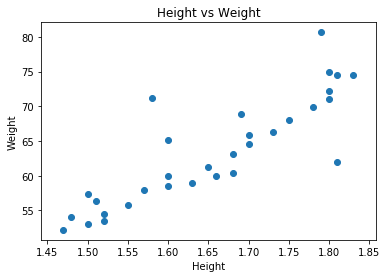

In [14]:
plt.scatter(df['Height'], df.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

In [15]:
df.Height.mean()

1.654516129032258

In [16]:
df.Weight.mean()

63.448387096774205

In [17]:
x = df.drop('Weight',axis=1) # col = 1 ; row = 0

In [18]:
x.head()

,Height
0,1.47
1,1.50
2,1.52
3,1.55
4,1.57


In [19]:
y = df['Weight']

In [20]:
y.head()

0    52.21
1    53.12
2    54.50
3    55.84
4    58.00
Name: Weight, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.30, random_state=12)

In [24]:
xtrain.shape

(21, 1)

In [25]:
ytrain.shape

(21,)

In [26]:
xtrain.head()

,Height
21,1.60
8,1.68
19,1.52
0,1.47
10,1.73


In [27]:
ytrain.head()

21    60.00
8     63.11
19    53.50
0     52.21
10    66.28
Name: Weight, dtype: float64

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()

In [30]:
reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
reg.coef_

array([55.95737816])

In [32]:
reg.intercept_

-28.96392846168027

In [33]:
reg.predict([[3200]])

array([179034.6461754])

In [34]:
#y = mx+c
out = ( 55.95737816*1.50 ) + (-28.96392846168027)

In [35]:
out

54.97213877831973

In [36]:
xtest

,Height
7,1.65
23,1.60
18,1.51
14,1.83
1,1.50
22,1.66
4,1.57
15,1.68
24,1.69
9,1.70


In [37]:
# y = 20.0199 * xtest + (-8579.79) 
pred = reg.predict(xtest)    # y = predicted output 

In [38]:
pred

array([63.3657455 , 60.56787659, 55.53171256, 73.43807357, 54.97213877,
       63.92531928, 58.88915525, 65.04446684, 65.60404062, 66.16361441])

In [40]:
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(ytest,pred)

8.08884642108355

Text(0.5, 1.0, 'Height vs Weight')

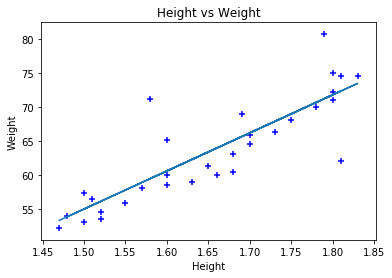

In [45]:
plt.plot(df.Height, reg.predict(x)) 
plt.scatter(df['Height'], df.Weight,marker='+',color='blue') 
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

In [46]:
reg.score(xtest,ytest)

0.7694740639694531